## #GRIPMAR21 - The sparks foundation
### Task-1 Predict the percentage of an student based on the no. of study hours.
### Name - Abhishek Patil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading dataset

In [3]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape


(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualization

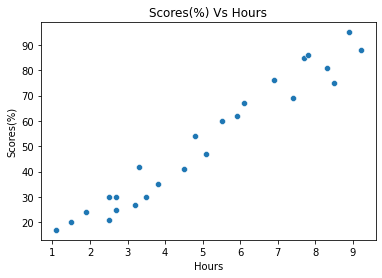

In [8]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) Vs Hours')
plt.show()

In [12]:
X=df[['Hours']]
y=df[['Scores']]

## Train-test-split

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=0)

In [20]:
Xtrain.shape,ytest.shape

((16, 1), (9, 1))

### Training Linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor=LinearRegression(fit_intercept=True)

In [25]:
regressor.fit(Xtrain,ytrain)

LinearRegression()

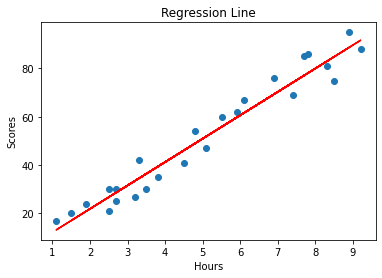

In [27]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

In [29]:
y_pred=regressor.predict(Xtest)
print(y_pred)


[[17.04289179]
 [33.51695377]
 [74.21757747]
 [26.73351648]
 [59.68164043]
 [39.33132858]
 [20.91914167]
 [78.09382734]
 [69.37226512]]


In [30]:
y_pred=y_pred.flatten()

In [32]:
data = pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':y_pred})

In [33]:
print(data)  #comparing actual and pedicted scores

   Actual  Prediction
0      20   17.042892
1      27   33.516954
2      69   74.217577
3      30   26.733516
4      62   59.681640
5      35   39.331329
6      24   20.919142
7      86   78.093827
8      76   69.372265


In [35]:
hours=np.array(9.25).reshape(1,-1)
result=regressor.predict(hours)
hours.item()
result.item()

92.14523314523314

#### For No. of hours:9.25 Predicted score (%): 93.69173248737538

## Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
RMSE= mean_squared_error(ytest,y_pred,squared=False)
print('The RMSE is: ',RMSE)

The RMSE is:  5.046115410711748


In [41]:
MSE= mean_squared_error(ytest,y_pred)
print('The MSE is: ',MSE)

The MSE is:  25.463280738222593


In [43]:
MAE= mean_absolute_error(ytest,y_pred)
print('The MAE is: ',MAE)

The MAE is:  4.6913974413974415
